# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Aluno 1:** Giovanna Paranhos
### **Matrícula 1:** 2023655476
### **Aluno 2:** Samir Saliba
### **Matrícula 1:** 2022685118

###Trabalho base:
#### **Aluno:** Asafe C. G. de  Medeiros // Helio Victor F. dos Santos
#### **Matrícula:** 2019006434 // 2019006680


### **Tema:** Dota 2 Matches (Pro Leagues)



# Introdução

Iremos trabalhar com uma base de dados relacionado ao jogo Dota 2. O conjunto de dados contém uma lista de mais de 150.000 partidas profissionais do Dota 2 a partir de 19/06/2011, na qual essas contêm informações sobre heróis, jogadores, pontuações, duração das partidas, placares entre outras informações relevantes para as partidas.

### **Base de dados:** https://www.kaggle.com/datasets/darianogina/dota-2-matches-pro-leagues

# Objetivo

   ### - Geral:

Nosso objetivo visa tentar clusterizar os jogadores com base em seu desempenho individual em cada partida.
  ### -Específicos

Usar os atributos dos jogadores, número de "kills", "mortes", "assists" e o "networth" identificar sua posição na partida.

Como critério de sucesso para o objetivo, queremos bons agrupamentos ou seja 5 clusters que correspondam às 5 posições reais, que são Carry, Midlane, Offlane, Support 4 e Support 5

# Metodologia
   - Inspirada no CRISP-DM e com a utilização do LLM ChatGPT 3.5

Para cada etapa do CRISP:
* Criaremos uma sessão no modelo de linguagem para esta etapa.
* Informáremos o LLM dos atributos contidos no conjunto de dados.
* Perguntas ou ações para o modelo de linguagem.



# Desenvolvimento

In [1]:
import pandas as pd

In [2]:
# INÍCIO CODIGO MANUAL

#Carregando a base de dados

url_partidas = 'https://media.githubusercontent.com/media/asafeclemente/mineracao-padroes-dota2/main/dota2_matches.csv'
df =  pd.read_csv(url_partidas)
df.info(verbose=True)

# FIM CODIGO MANUAL

/tmp/ipykernel_375298/2886953019.py:6: DtypeWarning: Columns (23,24,25,34,35,36,45,46,47,56,57,58,67,68,69,78,79,80,89,90,91,100,101,102,111,112,113,122,123,124) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(url_partidas)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159299 entries, 0 to 159298
Data columns (total 130 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    league                     object 
 1    league_id                  int64  
 2    league_tier                object 
 3    league_start_date_time     object 
 4    league_end_date_time       object 
 5    league_region              object 
 6    series_id                  int64  
 7    series_type                object 
 8    match_id                   int64  
 9    match_start_date_time      object 
 10   match_duration_seconds     int64  
 11   first_blood_time_seconds   float64
 12   radiant_team_id            float64
 13   radiant_team_name          object 
 14   dire_team_id               float64
 15   dire_team_name             object 
 16   winner_id                  float64
 17   radiant_kills              float64
 18   dire_kills                 float64
 19   radiant_player_1_id  

## 2. Data understanding (Entendimento dos dados)
[Link para a sessão do ChatGPT](https://chat.openai.com/share/8541198a-4f87-45b0-8267-a0d95f7eda55)

In [3]:
# INÍCIO CODIGO MANUAL
# Apenas alteramos o "print" das declarações describe para "display"
# FIM CODIGO MANUAL

# Separar o DataFrame em dois com base nos times 'radiant' e 'dire'
df_radiant = df.filter(like='radiant')
df_dire = df.filter(like='dire')

# Descrição estatística para a equipe Radiant
print("Descrição Estatística para a Equipe Radiant:")
display(df_radiant.describe())

# Descrição estatística para a equipe Dire
print("\nDescrição Estatística para a Equipe Dire:")
display(df_dire.describe())

Descrição Estatística para a Equipe Radiant:


,radiant_team_id,radiant_kills,radiant_player_1_id,radiant_player_1_hero_id,radiant_player_1_kills,radiant_player_1_deaths,radiant_player_1_assists,radiant_player_1_networth,radiant_player_2_id,radiant_player_2_hero_id,...,radiant_player_4_kills,radiant_player_4_deaths,radiant_player_4_assists,radiant_player_4_networth,radiant_player_5_id,radiant_player_5_hero_id,radiant_player_5_kills,radiant_player_5_deaths,radiant_player_5_assists,radiant_player_5_networth
count,1.584440e+05,40141.000000,1.592960e+05,159299.000000,159299.000000,159299.000000,159299.000000,77215.000000,1.592920e+05,159294.000000,...,159248.000000,159248.000000,159248.000000,77215.000000,1.592390e+05,159248.000000,159248.000000,159248.000000,159248.000000,77215.000000
mean,-1.570850e+08,29.257542,2.723362e+08,59.635955,5.285250,5.541730,10.980584,13434.477045,2.825983e+08,58.865946,...,5.140812,5.543461,11.170420,12518.533756,2.767483e+08,60.414913,5.200065,5.506499,11.049357,12824.403095
std,4.548559e+08,12.861031,3.305609e+08,36.486389,4.648445,3.552436,6.800993,7945.019140,3.347380e+08,36.589399,...,4.439538,3.546571,6.836996,7149.345454,3.318489e+08,36.447966,4.419171,3.554065,6.825302,7617.614059
min,-2.147455e+09,0.000000,1.974400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,5.100000e+01,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.625600e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.131534e+06,20.000000,9.618913e+07,27.000000,2.000000,3.000000,6.000000,7472.500000,1.020998e+08,25.000000,...,2.000000,3.000000,6.000000,7352.000000,9.979615e+07,28.000000,2.000000,3.000000,6.000000,7195.000000
50%,5.193446e+06,29.000000,1.371932e+08,58.000000,4.000000,5.000000,10.000000,11728.000000,1.477420e+08,55.000000,...,4.000000,5.000000,10.000000,10905.000000,1.433569e+08,60.000000,4.000000,5.000000,10.000000,11063.000000
75%,8.254112e+06,38.000000,2.740786e+08,89.000000,7.000000,8.000000,15.000000,17665.000000,2.907140e+08,89.000000,...,7.000000,8.000000,15.000000,16106.000000,2.794862e+08,90.000000,7.000000,8.000000,15.000000,16753.000000
max,9.186709e+06,88.000000,1.589140e+09,138.000000,128.000000,32.000000,85.000000,70461.000000,1.589140e+09,138.000000,...,154.000000,128.000000,88.000000,65904.000000,1.589140e+09,138.000000,86.000000,128.000000,68.000000,69503.000000



Descrição Estatística para a Equipe Dire:


,dire_team_id,dire_kills,dire_player_1_id,dire_player_1_hero_id,dire_player_1_kills,dire_player_1_deaths,dire_player_1_assists,dire_player_1_networth,dire_player_2_id,dire_player_2_hero_id,...,dire_player_4_kills,dire_player_4_deaths,dire_player_4_assists,dire_player_4_networth,dire_player_5_id,dire_player_5_hero_id,dire_player_5_kills,dire_player_5_deaths,dire_player_5_assists,dire_player_5_networth
count,1.583530e+05,40141.000000,1.592450e+05,159244.000000,159244.000000,159244.000000,159244.000000,77215.000000,1.592360e+05,159241.000000,...,159234.000000,159234.000000,159234.000000,77215.000000,1.592260e+05,159209.000000,159209.000000,159209.000000,159209.000000,77215.000000
mean,-1.573174e+08,29.863257,2.724347e+08,59.573931,5.243413,5.588255,10.904505,13572.666049,2.815854e+08,58.797000,...,5.103985,5.568836,11.179057,12539.932254,2.773090e+08,60.214749,5.195115,5.537815,11.013215,12947.630344
std,4.559011e+08,13.092262,3.302244e+08,36.402053,4.655909,3.468414,6.952386,8192.868974,3.339126e+08,36.514096,...,4.422834,3.432302,7.087208,7219.535860,3.321787e+08,36.405260,4.531006,3.449885,7.012309,7819.759807
min,-2.147455e+09,0.000000,3.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,3.300000e+01,0.000000,...,0.000000,0.000000,0.000000,1.000000,3.100000e+01,0.000000,0.000000,0.000000,0.000000,3.000000
25%,1.107608e+06,20.000000,9.663558e+07,27.000000,2.000000,3.000000,6.000000,7431.500000,1.020998e+08,25.000000,...,2.000000,3.000000,6.000000,7333.000000,1.000287e+08,28.000000,2.000000,3.000000,6.000000,7211.000000
50%,5.138280e+06,30.000000,1.371932e+08,58.000000,4.000000,5.000000,10.000000,11775.000000,1.477672e+08,55.000000,...,4.000000,5.000000,10.000000,10951.000000,1.436934e+08,60.000000,4.000000,5.000000,10.000000,11098.000000
75%,8.244493e+06,39.000000,2.758264e+08,89.000000,7.000000,8.000000,15.000000,17948.000000,2.883280e+08,88.000000,...,7.000000,8.000000,16.000000,16173.500000,2.825570e+08,89.000000,7.000000,8.000000,15.000000,16962.500000
max,9.186709e+06,99.000000,1.583926e+09,138.000000,116.000000,40.000000,63.000000,82511.000000,1.583926e+09,138.000000,...,103.000000,35.000000,67.000000,75489.000000,1.589140e+09,138.000000,115.000000,34.000000,59.000000,76805.000000


## 3. Data preparation (Preparação dos dados)
[Link para a sessão do ChatGPT](https://chat.openai.com/share/e5dd8d63-ceb3-42e1-ade7-28207bedb3ed)

**Observação: incluímos manualmente os campos referentes a "position" nas listas abaixo.**

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Substitua 'df' pelo nome real do seu DataFrame, se necessário

# Lista de colunas numéricas para o time Dire
dire_numeric_columns = [
    'match_duration_seconds', 'first_blood_time_seconds', 'dire_kills',
    'dire_player_1_hero_id', 'dire_player_1_kills', 'dire_player_1_deaths', 'dire_player_1_assists',
    'dire_player_1_networth', 'dire_player_2_hero_id', 'dire_player_2_kills', 'dire_player_2_deaths',
    'dire_player_2_assists', 'dire_player_2_networth', 'dire_player_3_hero_id', 'dire_player_3_kills',
    'dire_player_3_deaths', 'dire_player_3_assists', 'dire_player_3_networth', 'dire_player_4_hero_id',
    'dire_player_4_kills', 'dire_player_4_deaths', 'dire_player_4_assists', 'dire_player_4_networth',
    'dire_player_5_hero_id', 'dire_player_5_kills', 'dire_player_5_deaths', 'dire_player_5_assists',
    'dire_player_5_networth',
]

# Lista de colunas numéricas para o time Radiant
radiant_numeric_columns = [
    'match_duration_seconds', 'first_blood_time_seconds', 'radiant_kills',
    'radiant_player_1_hero_id', 'radiant_player_1_kills', 'radiant_player_1_deaths', 'radiant_player_1_assists',
    'radiant_player_1_networth', 'radiant_player_2_hero_id', 'radiant_player_2_kills', 'radiant_player_2_deaths',
    'radiant_player_2_assists', 'radiant_player_2_networth', 'radiant_player_3_hero_id', 'radiant_player_3_kills',
    'radiant_player_3_deaths', 'radiant_player_3_assists', 'radiant_player_3_networth', 'radiant_player_4_hero_id',
    'radiant_player_4_kills', 'radiant_player_4_deaths', 'radiant_player_4_assists', 'radiant_player_4_networth',
    'radiant_player_5_hero_id', 'radiant_player_5_kills', 'radiant_player_5_deaths', 'radiant_player_5_assists',
    'radiant_player_5_networth',
]

# Separando as features para o time Dire e removendo linhas nulas
dire_features = df[dire_numeric_columns].dropna().copy()

# Separando as features para o time Radiant e removendo linhas nulas
radiant_features = df[radiant_numeric_columns].dropna().copy()

# Normalizando os dados
scaler_dire = StandardScaler()
scaler_radiant = StandardScaler()

dire_features_normalized = scaler_dire.fit_transform(dire_features)
radiant_features_normalized = scaler_radiant.fit_transform(radiant_features)

# Aplicando PCA para obter apenas uma componente principal
n_components = 1

pca_dire = PCA(n_components=n_components)
pca_radiant = PCA(n_components=n_components)

dire_pca_result = pca_dire.fit_transform(dire_features_normalized)
radiant_pca_result = pca_radiant.fit_transform(radiant_features_normalized)

# Adicionando as componentes principais ao dataframe original
df.loc[dire_features.index, 'Dire_PC1'] = dire_pca_result
df.loc[radiant_features.index, 'Radiant_PC1'] = radiant_pca_result

# Agora, o dataframe original contém as componentes principais para as equipes Dire e Radiant


In [6]:
# Selecionando colunas desejadas para o time Dire
dire_selected_columns = [
    'dire_player_1_kills', 'dire_player_1_assists', 'dire_player_1_deaths', 'dire_player_1_networth', 'dire_player_1_position',
    'dire_player_2_kills', 'dire_player_2_assists', 'dire_player_2_deaths', 'dire_player_2_networth', 'dire_player_2_position',
    'dire_player_3_kills', 'dire_player_3_assists', 'dire_player_3_deaths', 'dire_player_3_networth', 'dire_player_3_position',
    'dire_player_4_kills', 'dire_player_4_assists', 'dire_player_4_deaths', 'dire_player_4_networth', 'dire_player_4_position',
    'dire_player_5_kills', 'dire_player_5_assists', 'dire_player_5_deaths', 'dire_player_5_networth', 'dire_player_5_position',
    'Dire_PC1'
]

# Selecionando colunas desejadas para o time Radiant
radiant_selected_columns = [
    'radiant_player_1_kills', 'radiant_player_1_assists', 'radiant_player_1_deaths', 'radiant_player_1_networth', 'radiant_player_1_position',
    'radiant_player_2_kills', 'radiant_player_2_assists', 'radiant_player_2_deaths', 'radiant_player_2_networth', 'radiant_player_2_position',
    'radiant_player_3_kills', 'radiant_player_3_assists', 'radiant_player_3_deaths', 'radiant_player_3_networth', 'radiant_player_3_position',
    'radiant_player_4_kills', 'radiant_player_4_assists', 'radiant_player_4_deaths', 'radiant_player_4_networth', 'radiant_player_4_position',
    'radiant_player_5_kills', 'radiant_player_5_assists', 'radiant_player_5_deaths', 'radiant_player_5_networth', 'radiant_player_5_position',
    'Radiant_PC1'
]

# Criando novos dataframes apenas com as colunas desejadas
df_dire_selected = df[dire_selected_columns].copy()
df_radiant_selected = df[radiant_selected_columns].copy()

# Padronizando os nomes das colunas para facilitar a concatenação
player_columns = ['kills', 'assists', 'deaths', 'networth', 'position']

for i in range(1, 6):
    for col in player_columns:
        df_dire_selected[f'{col}_{i}'] = df_dire_selected[f'dire_player_{i}_{col}']
        df_radiant_selected[f'{col}_{i}'] = df_radiant_selected[f'radiant_player_{i}_{col}']

# Removendo colunas antigas após padronização
df_dire_selected = df_dire_selected[['kills_1', 'assists_1', 'deaths_1', 'networth_1', 'position_1', 'kills_2', 'assists_2', 'deaths_2', 'networth_2', 'position_2',
                                     'kills_3', 'assists_3', 'deaths_3', 'networth_3', 'position_3', 'kills_4', 'assists_4', 'deaths_4', 'networth_4', 'position_4',
                                     'kills_5', 'assists_5', 'deaths_5', 'networth_5', 'position_5', 'Dire_PC1']]

df_radiant_selected = df_radiant_selected[['kills_1', 'assists_1', 'deaths_1', 'networth_1', 'position_1', 'kills_2', 'assists_2', 'deaths_2', 'networth_2', 'position_2',
                                           'kills_3', 'assists_3', 'deaths_3', 'networth_3', 'position_3', 'kills_4', 'assists_4', 'deaths_4', 'networth_4', 'position_4',
                                           'kills_5', 'assists_5', 'deaths_5', 'networth_5', 'position_5', 'Radiant_PC1']]

# Agora, os dataframes df_dire_selected e df_radiant_selected possuem as colunas padronizadas e podem ser concatenados.


In [7]:
# Substitua 'df_dire_selected' e 'df_radiant_selected' pelos seus dataframes reais, se necessário

# Renomeando as colunas Dire_PC1 e Radiant_PC1
df_dire_selected = df_dire_selected.rename(columns={'Dire_PC1': 'PC1'})
df_radiant_selected = df_radiant_selected.rename(columns={'Radiant_PC1': 'PC1'})

# Concatenando os dois dataframes empilhando (axis=0)
df_combined = pd.concat([df_dire_selected, df_radiant_selected], axis=0)

# Agora, o dataframe df_combined contém os dados empilhados dos times Dire e Radiant, com as colunas renomeadas.


In [8]:
display(df_combined)

,kills_1,assists_1,deaths_1,networth_1,position_1,kills_2,assists_2,deaths_2,networth_2,position_2,...,assists_4,deaths_4,networth_4,position_4,kills_5,assists_5,deaths_5,networth_5,position_5,PC1
0,4.0,10.0,7.0,19112.0,POSITION_1,7.0,16.0,5.0,18891.0,POSITION_3,...,8.0,3.0,20682.0,POSITION_2,2.0,13.0,11.0,13026.0,POSITION_5,0.830258
1,7.0,11.0,10.0,10832.0,POSITION_5,5.0,18.0,6.0,12882.0,POSITION_4,...,13.0,3.0,18351.0,POSITION_2,3.0,21.0,6.0,15906.0,POSITION_3,1.030858
2,11.0,9.0,0.0,22845.0,POSITION_2,2.0,9.0,4.0,10776.0,POSITION_4,...,18.0,7.0,10449.0,POSITION_5,7.0,11.0,3.0,18558.0,POSITION_1,-0.009708
3,4.0,12.0,7.0,16451.0,POSITION_3,2.0,10.0,8.0,11100.0,POSITION_4,...,8.0,1.0,25916.0,POSITION_1,1.0,13.0,12.0,8455.0,POSITION_5,-0.257102
4,5.0,25.0,2.0,6333.0,POSITION_5,15.0,9.0,2.0,13093.0,POSITION_3,...,21.0,2.0,6154.0,POSITION_4,9.0,17.0,4.0,10374.0,POSITION_2,0.705622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159294,3.0,9.0,9.0,5281.0,NaN,6.0,11.0,9.0,6646.0,NaN,...,6.0,8.0,10774.0,NaN,0.0,8.0,8.0,5429.0,NaN,NaN
159295,3.0,9.0,14.0,3613.0,NaN,11.0,6.0,15.0,6119.0,NaN,...,8.0,18.0,2168.0,NaN,2.0,10.0,18.0,2027.0,NaN,NaN
159296,2.0,2.0,2.0,7954.0,NaN,4.0,8.0,7.0,4039.0,NaN,...,11.0,5.0,6335.0,NaN,2.0,8.0,6.0,3515.0,NaN,NaN
159297,2.0,3.0,11.0,2688.0,NaN,6.0,7.0,8.0,5014.0,NaN,...,13.0,12.0,2832.0,NaN,1.0,10.0,12.0,4538.0,NaN,NaN


In [9]:
# Substitua 'df_combined' pelo seu dataframe real, se necessário

# Removendo linhas com valores NaN
df_combined = df_combined.dropna()

# Agora, o dataframe df_combined não contém linhas com valores NaN.


In [10]:
from sklearn.preprocessing import StandardScaler

# Substitua 'df_combined' pelo seu dataframe real, se necessário

# Lista de grupos de colunas
column_groups = [['kills_1', 'kills_2', 'kills_3', 'kills_4', 'kills_5'],
                 ['deaths_1', 'deaths_2', 'deaths_3', 'deaths_4', 'deaths_5'],
                 ['assists_1', 'assists_2', 'assists_3', 'assists_4', 'assists_5'],
                 ['networth_1', 'networth_2', 'networth_3', 'networth_4', 'networth_5']]

# Normalizando cada grupo de colunas
scaler = StandardScaler()

for group in column_groups:
    df_combined[group] = scaler.fit_transform(df_combined[group])

# Agora, as colunas 'kills', 'deaths', 'assists' e 'networth' estão normalizadas agrupadamente.


In [11]:
# Substitua 'df_combined' pelo seu dataframe real, se necessário

# Dividindo o dataframe em cinco dataframes
player_dfs = []

for player_id in range(1, 6):
    player_columns = [f'kills_{player_id}', f'assists_{player_id}', f'deaths_{player_id}', f'networth_{player_id}', f'position_{player_id}', 'PC1']
    player_df = df_combined[player_columns].copy()
    player_df.columns = ['kills', 'assists', 'deaths', 'networth', 'position', 'PC1']  # Padronizando os nomes das colunas
    player_dfs.append(player_df)

# Empilhando os dataframes
df_players_stacked = pd.concat(player_dfs, axis=0)

# Agora, o dataframe df_players_stacked contém as estatísticas empilhadas para cada jogador.


In [12]:
display(df_players_stacked)

,kills,assists,deaths,networth,position,PC1
0,-0.416210,-0.242446,0.331959,0.527341,POSITION_1,0.830258
1,0.212996,-0.099570,1.173741,-0.472420,POSITION_5,1.030858
2,1.051937,-0.385322,-1.632199,0.978079,POSITION_2,-0.009708
3,-0.416210,0.043306,0.331959,0.206041,POSITION_3,-0.257102
4,-0.206475,1.900696,-1.071011,-1.015647,POSITION_5,0.705622
...,...,...,...,...,...,...
40769,-0.771869,-1.137171,1.343769,-0.816125,POSITION_5,-2.475229
44046,-0.333238,-0.579330,-1.406622,0.370686,POSITION_3,-1.005762
45575,-0.991184,-1.416091,0.243613,-0.612960,POSITION_1,-4.743373
52120,-1.210499,-0.997710,0.243613,-0.541537,POSITION_3,-2.350963


In [13]:
from sklearn.decomposition import PCA

# Substitua 'df_players_stacked' pelo seu dataframe real, se necessário

# Removendo linhas com valores NaN
df_players_stacked = df_players_stacked.dropna()

# Selecionando as colunas relevantes para o PCA
pca_columns = ['kills', 'deaths', 'assists']

# Selecionando as colunas adicionais para o merge
merge_columns = ['networth', 'position']

# Realizando o PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_players_stacked[pca_columns])

# Criando um dataframe com os componentes principais
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Criando um dataframe com as colunas adicionais
df_additional = df_players_stacked[merge_columns]

# Resetando os índices para evitar o erro de indexação
df_pca.reset_index(drop=True, inplace=True)
df_additional.reset_index(drop=True, inplace=True)

# Concatenando os dataframes de componentes principais e colunas adicionais
df_merged = pd.concat([df_pca, df_additional], axis=1)

# Agora, o dataframe df_merged contém os componentes principais do PCA, networth e position.


In [14]:
display(df_merged)

,PC1,PC2,networth,position
0,-0.577378,-0.088276,0.527341,POSITION_1
1,-0.595503,0.537991,-0.472420,POSITION_5
2,1.686615,-1.031110,0.978079,POSITION_2
3,-0.501865,0.155295,0.206041,POSITION_3
4,1.012685,1.050308,-1.015647,POSITION_5
...,...,...,...,...
401095,-1.703265,-0.379390,-0.816125,POSITION_5
401096,0.471363,-1.249713,0.370686,POSITION_3
401097,-1.258013,-1.203337,-0.612960,POSITION_1
401098,-1.309634,-0.873311,-0.541537,POSITION_3


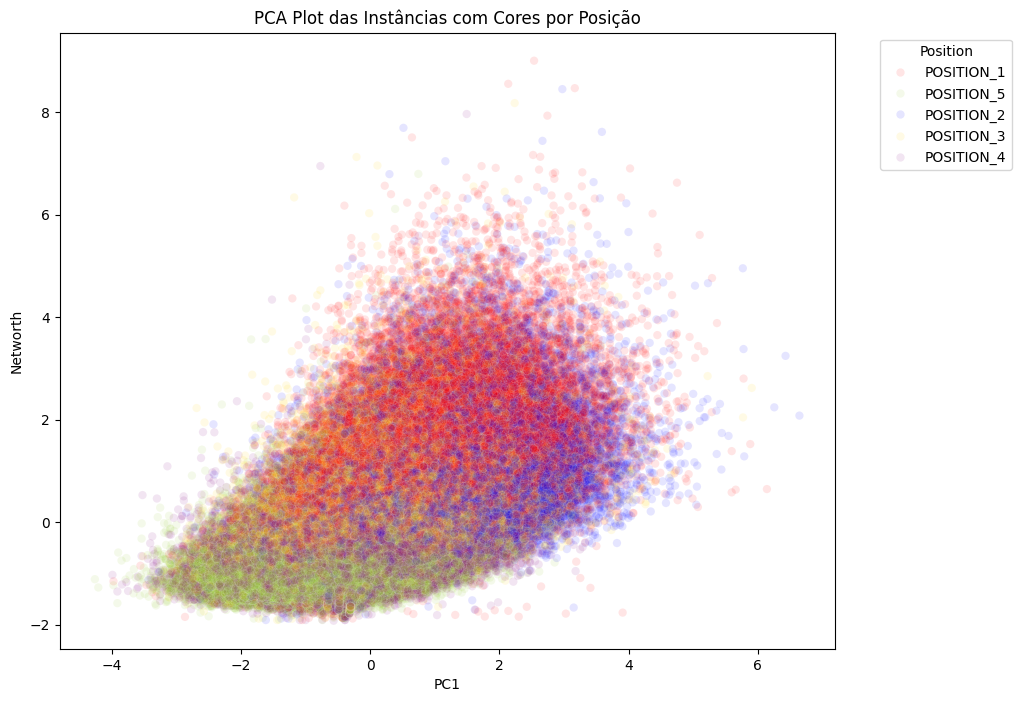

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Substitua 'df_merged' pelo seu dataframe real, se necessário

# Mapeamento de cores
colors = {'POSITION_1': 'red', 'POSITION_2': 'blue', 'POSITION_3': 'gold', 'POSITION_4': 'purple', 'POSITION_5': 'yellowgreen'}

# Plotando o gráfico de dispersão com cores de acordo com a coluna 'position' e transparência s=0.1
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='networth', hue='position', data=df_merged, palette=colors, alpha=0.1)
plt.title('PCA Plot das Instâncias com Cores por Posição')
plt.xlabel('PC1')
plt.ylabel('Networth')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibindo o gráfico
plt.show()


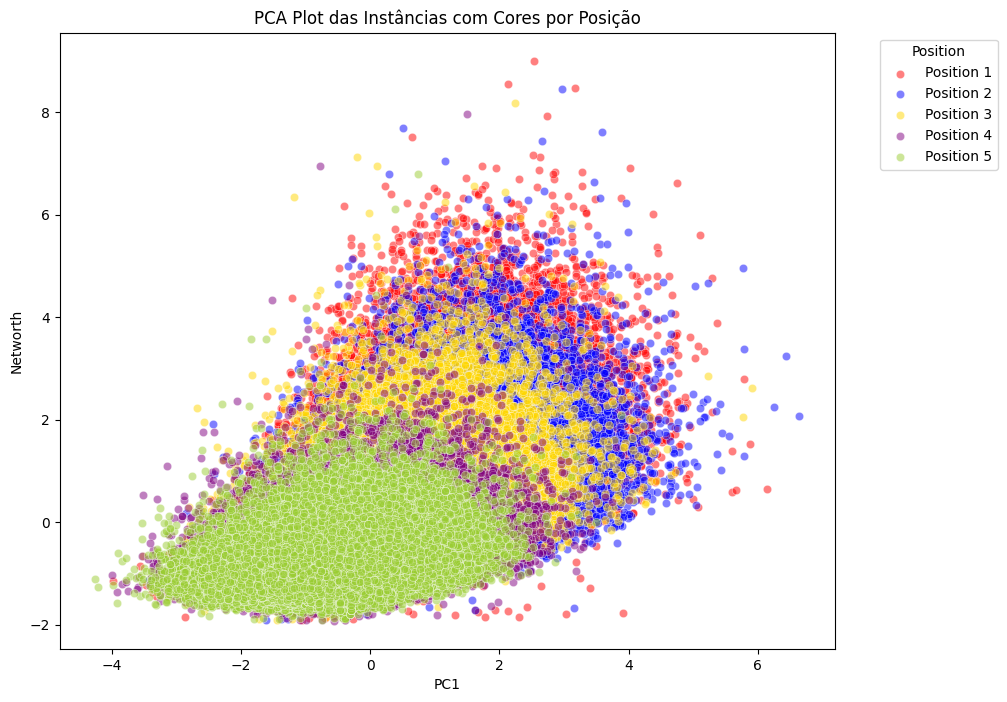

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Substitua 'df_merged' pelo seu dataframe real, se necessário
df_merged = df_merged.dropna()

# Mapeamento de cores
colors = {'POSITION_1': 'red', 'POSITION_2': 'blue', 'POSITION_3': 'gold', 'POSITION_4': 'purple', 'POSITION_5': 'yellowgreen'}

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 8))

# Iterando sobre as posições e plotando os gráficos
for position in colors.keys():
    sns.scatterplot(x='PC1', y='networth', data=df_merged[df_merged['position'] == position],
                    label=f'Position {position[-1]}', color=colors[position], alpha=0.5)

# Adicionando título e rótulos aos eixos
plt.title('PCA Plot das Instâncias com Cores por Posição')
plt.xlabel('PC1')
plt.ylabel('Networth')

# Adicionando legenda
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibindo o gráfico
plt.show()


# 4. Modelagem

[Link para a sessão do ChatGPT](https://chat.openai.com/share/d53c568f-61fb-4232-947c-be9ce9cc882b)

In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401100 entries, 0 to 401099
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   PC1       401100 non-null  float64
 1   PC2       401100 non-null  float64
 2   networth  401100 non-null  float64
 3   position  401100 non-null  object 
dtypes: float64(3), object(1)
memory usage: 12.2+ MB


/home/samirj/miniconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


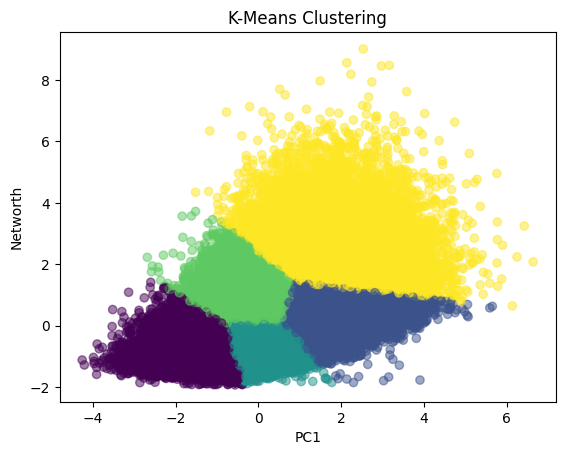

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja chamado df
# Selecione as colunas necessárias para o clustering
data_for_clustering = df_merged[['PC1', 'networth']]

# Inicialize o modelo K-Means com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajuste o modelo aos dados
kmeans.fit(data_for_clustering)

# Adicione as informações de cluster ao DataFrame original
df_merged['cluster'] = kmeans.labels_

# Visualize os clusters
plt.scatter(df_merged['PC1'], df_merged['networth'], c=df_merged['cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('PC1')
plt.ylabel('Networth')
plt.show()


# 5. Resultados experimentais e análise

[Link para a sessão do ChatGPT](https://chat.openai.com/share/f504e74f-c07a-48c1-960f-e192eebe4897)

In [19]:
df_merged.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401100 entries, 0 to 401099
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   PC1       401100 non-null  float64
 1   PC2       401100 non-null  float64
 2   networth  401100 non-null  float64
 3   position  401100 non-null  object 
 4   cluster   401100 non-null  int32  
dtypes: float64(3), int32(1), object(1)
memory usage: 13.8+ MB


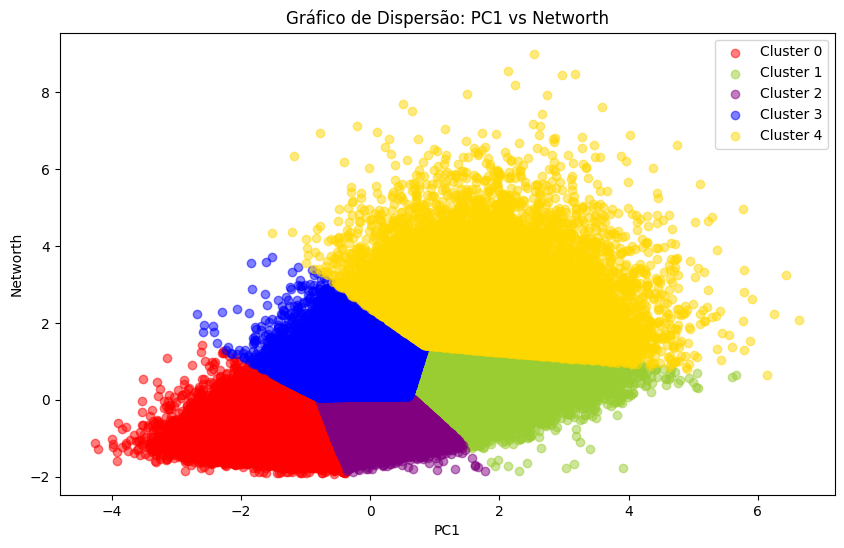

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# Mapear os clusters para as cores desejadas
cluster_colors = {0: 'red', 1: 'yellowgreen', 2: 'purple', 3: 'blue', 4: 'gold'}
df_merged['cluster_color'] = df_merged['cluster'].map(cluster_colors)

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
for cluster, color in cluster_colors.items():
    subset = df_merged[df_merged['cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['networth'], label=f'Cluster {cluster}', color=color, alpha=0.5)

plt.title('Gráfico de Dispersão: PC1 vs Networth')
plt.xlabel('PC1')
plt.ylabel('Networth')
plt.legend()
plt.show()


In [29]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Calcular o Adjusted Rand Score
rand_score = adjusted_rand_score(df_merged['position'], df_merged['cluster'])
print(f"Adjusted Rand Score: {rand_score}")

# Calcular o Normalized Mutual Information Score
nmi_score = normalized_mutual_info_score(df_merged['position'], df_merged['cluster'])
print(f"Normalized Mutual Information Score: {nmi_score}")


Adjusted Rand Score: 0.0837247443031828
Normalized Mutual Information Score: 0.12696209506510467
